In [1184]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import xgboost as xgb
from keras.wrappers.scikit_learn import KerasClassifier   #o Sci-Keras!!!

#Importamos los datasets

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

dataset_hotels_train.drop(['reservation_status_date'], axis='columns', inplace=True) 
dataset_hotels_test.drop(['reservation_status_date'], axis='columns', inplace=True) 

# Preprocesamiento

In [1185]:
dataset_hotels_test_id = dataset_hotels_test['id'].copy()

In [1186]:
dataset_hotels_train.drop(['id','arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month'], axis='columns', inplace=True)
dataset_hotels_test.drop(['id','arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month'], axis='columns', inplace=True)

In [1187]:
#creo variable cant personas elimino children adults and babies
dataset_hotels_train['cant_personas'] = dataset_hotels_train['children'].fillna(0) + dataset_hotels_train['adults'].fillna(0) + dataset_hotels_train['babies'].fillna(0)
dataset_hotels_train['cant_personas'] = dataset_hotels_train['cant_personas'].astype('int')
dataset_hotels_train.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

dataset_hotels_test['cant_personas'] = dataset_hotels_test['children'].fillna(0) + dataset_hotels_test['adults'].fillna(0) + dataset_hotels_test['babies'].fillna(0)
dataset_hotels_test['cant_personas'] = dataset_hotels_test['cant_personas'].astype('int')
dataset_hotels_test.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [1188]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('ninguno')
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('ninguno')

In [1189]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('desconocida')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('desconocida')

In [1190]:
# agrupo market segment
lista_market_segment_mayoritarios = dataset_hotels_train['market_segment'].value_counts().nlargest(5).index.tolist()
dataset_hotels_train['market_segment'] = pd.Series(np.where(~dataset_hotels_train['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_train['market_segment']))
dataset_hotels_test['market_segment'] = pd.Series(np.where(~dataset_hotels_test['market_segment'].isin(lista_market_segment_mayoritarios), 'otro market', dataset_hotels_test['market_segment']))

In [1191]:
# agrupo distribution channel
lista_distribution_channel_mayoritarios = dataset_hotels_train['distribution_channel'].value_counts().nlargest(3).index.tolist()
dataset_hotels_train['distribution_channel'] = pd.Series(np.where(~dataset_hotels_train['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_train['distribution_channel']))
dataset_hotels_test['distribution_channel'] = pd.Series(np.where(~dataset_hotels_test['distribution_channel'].isin(lista_distribution_channel_mayoritarios), 'otro distribution channel', dataset_hotels_test['distribution_channel']))

In [1192]:
# agrupo assigned_room_type
lista_paises_mayoritarios = dataset_hotels_train['assigned_room_type'].value_counts().nlargest(3).index.tolist()
dataset_hotels_train['assigned_room_type'] = pd.Series(np.where(~dataset_hotels_train['assigned_room_type'].isin(lista_paises_mayoritarios), 'Otro room asignado', dataset_hotels_train['assigned_room_type']))
dataset_hotels_test['assigned_room_type'] = pd.Series(np.where(~dataset_hotels_test['assigned_room_type'].isin(lista_paises_mayoritarios), 'Otro room asignado', dataset_hotels_test['assigned_room_type']))

In [1193]:
# agrupo reserved_room_type
lista_paises_mayoritarios = dataset_hotels_train['reserved_room_type'].value_counts().nlargest(3).index.tolist()
dataset_hotels_train['reserved_room_type'] = pd.Series(np.where(~dataset_hotels_train['reserved_room_type'].isin(lista_paises_mayoritarios), 'Otro room reservado', dataset_hotels_train['reserved_room_type']))
dataset_hotels_test['reserved_room_type'] = pd.Series(np.where(~dataset_hotels_test['reserved_room_type'].isin(lista_paises_mayoritarios), 'Otro room reservado', dataset_hotels_test['reserved_room_type']))

In [1194]:
lista_agent_mayoritarios = dataset_hotels_train['agent'].value_counts().nlargest(4).index.tolist()
dataset_hotels_train['agent'] = pd.Series(np.where(~dataset_hotels_train['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_train['agent']))
dataset_hotels_test['agent'] = pd.Series(np.where(~dataset_hotels_test['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_test['agent']))

In [1195]:
lista_company_mayoritarios = dataset_hotels_train['company'].value_counts().nlargest(1).index.tolist()
dataset_hotels_train['company'] = pd.Series(np.where(~dataset_hotels_train['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_train['company']))
dataset_hotels_test['company'] = pd.Series(np.where(~dataset_hotels_test['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_test['company']))

In [1196]:
lista_paises_mayoritarios = dataset_hotels_train['country'].value_counts().nlargest(5).index.tolist()
dataset_hotels_train['country'] = pd.Series(np.where(~dataset_hotels_train['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_train['country']))
dataset_hotels_test['country'] = pd.Series(np.where(~dataset_hotels_test['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_test['country']))

In [1197]:
max_stays_in_weekend_nights = dataset_hotels_train['stays_in_weekend_nights'].value_counts().nlargest(3).index.tolist()
dataset_hotels_train['stays_in_weekend_nights'] = pd.Series(np.where(~dataset_hotels_train['stays_in_weekend_nights'].isin(max_stays_in_weekend_nights), 'muchos dias', dataset_hotels_train['stays_in_weekend_nights']))
dataset_hotels_test['stays_in_weekend_nights'] = pd.Series(np.where(~dataset_hotels_test['stays_in_weekend_nights'].isin(max_stays_in_weekend_nights), 'muchos dias', dataset_hotels_test['stays_in_weekend_nights']))

In [1198]:
max_stays_in_week_nights = dataset_hotels_train['stays_in_week_nights'].value_counts().nlargest(6).index.tolist()
dataset_hotels_train['stays_in_week_nights'] = pd.Series(np.where(~dataset_hotels_train['stays_in_week_nights'].isin(max_stays_in_week_nights), 'muchos dias', dataset_hotels_train['stays_in_week_nights']))
dataset_hotels_test['stays_in_week_nights'] = pd.Series(np.where(~dataset_hotels_test['stays_in_week_nights'].isin(max_stays_in_week_nights), 'muchos dias', dataset_hotels_test['stays_in_week_nights']))

In [1199]:
dataset_hotels_train = dataset_hotels_train.reindex(sorted(dataset_hotels_train.columns), axis=1)
dataset_hotels_test = dataset_hotels_test.reindex(sorted(dataset_hotels_test.columns), axis=1)

In [1200]:
dataset_hotels_train = pd.get_dummies(dataset_hotels_train)
dataset_hotels_test = pd.get_dummies(dataset_hotels_test)

In [1201]:
dataset_hotels_train.shape

(61913, 67)

In [1202]:
dataset_hotels_test.shape

(26535, 66)

In [1203]:
columnas_numericas = dataset_hotels_train.select_dtypes(include=np.number).columns.tolist()
columnas_numericas

['adr',
 'booking_changes',
 'cant_personas',
 'days_in_waiting_list',
 'is_canceled',
 'is_repeated_guest',
 'lead_time',
 'previous_bookings_not_canceled',
 'previous_cancellations',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'agent_1.0',
 'agent_9.0',
 'agent_240.0',
 'agent_desconocida',
 'agent_otra agencia',
 'assigned_room_type_A',
 'assigned_room_type_D',
 'assigned_room_type_E',
 'assigned_room_type_Otro room asignado',
 'company_con compay',
 'company_ninguno',
 'country_DEU',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_Otro Pais',
 'country_PRT',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_TA/TO',
 'distribution_channel_otro distribution channel',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'market_seg

In [1204]:
# ('deposit_type_Non Refund', 0.4832999708392823),
#  ('country_PRT', 0.21609827450349273),
#  ('lead_time', 0.11912688227209116),
#  ('agent_otra agencia', 0.10541081115271925),
#  ('required_car_parking_spaces', 0.07225536124981723),
#  ('country_DEU', 0.0025763405076474287),
#  ('customer_type_Transient', 0.0011653971216939812),
#  ('cant_personas', 5.799439492464228e-05),
#  ('adr', 8.967958331353874e-06),

In [1205]:
dataset_hotels_train = pd.get_dummies(dataset_hotels_train, drop_first=True)
dataset_hotels_test = pd.get_dummies(dataset_hotels_test, drop_first=True)

In [1206]:
columnas_filtrar_red_dim = ['deposit_type_Non Refund','country_PRT','lead_time','agent_otra agencia','required_car_parking_spaces','country_DEU','customer_type_Transient','cant_personas','adr']

In [1207]:
dataset_hotels_train = dataset_hotels_train[columnas_filtrar_red_dim + ['is_canceled']]
dataset_hotels_test = dataset_hotels_test[columnas_filtrar_red_dim]

In [1208]:
dataset_hotels_train.describe()

,deposit_type_Non Refund,country_PRT,lead_time,agent_otra agencia,required_car_parking_spaces,country_DEU,customer_type_Transient,cant_personas,adr,is_canceled
count,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,0.163940,0.45144,112.248187,0.407168,0.049957,0.053494,0.766382,1.974836,102.383773,0.499750
std,0.370224,0.49764,110.717953,0.491311,0.221023,0.225019,0.423135,0.731700,47.757640,0.500004
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,0.000000,0.00000,23.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.000000,0.000000
50%,0.000000,0.00000,78.000000,0.000000,0.000000,0.000000,1.000000,2.000000,95.000000,0.000000
75%,0.000000,1.00000,172.000000,1.000000,0.000000,0.000000,1.000000,2.000000,126.000000,1.000000
max,1.000000,1.00000,629.000000,1.000000,8.000000,1.000000,1.000000,55.000000,510.000000,1.000000


In [1209]:
columnas_a_normalizar = ['lead_time','adr','cant_personas','required_car_parking_spaces']

In [1210]:
dataset_hotels_train.shape

(61913, 10)

In [1211]:
stand_scaler = StandardScaler()
x_train_norm = pd.DataFrame(stand_scaler.fit_transform(dataset_hotels_train[columnas_a_normalizar]))
x_train_norm.columns = columnas_a_normalizar
dataset_hotels_train[columnas_a_normalizar] = x_train_norm[columnas_a_normalizar]



In [1212]:
x_test_norm = pd.DataFrame(stand_scaler.transform(dataset_hotels_test[columnas_a_normalizar]))
x_test_norm.columns = columnas_a_normalizar
dataset_hotels_test[columnas_a_normalizar] = x_test_norm[columnas_a_normalizar]

##Seperato test / train

In [1213]:
x_train, x_test, y_train, y_test = train_test_split(dataset_hotels_train.drop(columns = 'is_canceled'),dataset_hotels_train['is_canceled'],test_size=0.3)

In [1214]:
dataset_hotels_test.shape

(26535, 9)

#MODELO

In [1215]:
from keras import backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


In [1216]:
# Create the sklearn model for the network
cant_clases = 2
d_in=len(x_train.columns)
def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense(2,input_shape=(d_in,), activation='relu',kernel_initializer='uniform'),
    keras.layers.Dense(cant_clases, activation='softmax'),
    keras.layers.Dense(cant_clases, activation='softmax'),
    keras.layers.Dense(cant_clases, activation='softmax'),
    keras.layers.Dense(cant_clases, activation='softmax'),
    keras.layers.Dense(cant_clases, activation='softmax')
    ])
    
    modelo.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9,beta_2=0.999),
      loss='categorical_crossentropy', 
      metrics=[get_f1, 'accuracy'], 
    )
    

    return modelo

modelo_cv = KerasClassifier(build_fn=create_model, verbose=100)

<ipython-input-1216-f6c22c58b495>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_cv = KerasClassifier(build_fn=create_model, verbose=100)


In [1217]:
from sklearn.model_selection import GridSearchCV

param_grid={'batch_size': [8,16,32, 64, 128], 
            'nb_epoch':[3, 5, 7]}

print(param_grid)


grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid, scoring='f1', cv=5, verbose=100)
grid_result = grid.fit(x_train, y_train)

{'batch_size': [8, 16, 32, 64, 128], 'nb_epoch': [3, 5, 7]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START batch_size=8, nb_epoch=3...................................
271/271 [==============================] - 0s 1ms/step
[CV 1/5; 1/15] END ....batch_size=8, nb_epoch=3;, score=0.696 total time=  12.1s
[CV 2/5; 1/15] START batch_size=8, nb_epoch=3...................................
271/271 [==============================] - 0s 1ms/step
[CV 2/5; 1/15] END ....batch_size=8, nb_epoch=3;, score=0.804 total time=  12.1s
[CV 3/5; 1/15] START batch_size=8, nb_epoch=3...................................
271/271 [==============================] - 0s 1ms/step
[CV 3/5; 1/15] END ....batch_size=8, nb_epoch=3;, score=0.778 total time=  12.1s
[CV 4/5; 1/15] START batch_size=8, nb_epoch=3...................................
271/271 [==============================] - 1s 2ms/step
[CV 4/5; 1/15] END ....batch_size=8, nb_epoch=3;, score=0.782 total time=   8.8s
[CV 5/5; 1/

###Evaluacion del modelo

In [1218]:
print("Mejor modelo: %f %s" % (grid_result.best_score_, grid_result.best_params_))
print(grid_result.best_estimator_)

Mejor modelo: 0.797565 {'batch_size': 16, 'nb_epoch': 7}


581/581 [==============================] - 1s 1ms/step
F1-Score: 0.7867877436142531


Text(50.722222222222214, 0.5, 'True')

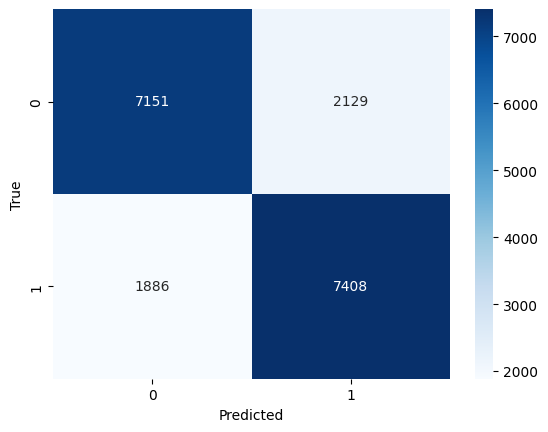

In [1219]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= grid_result.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [1220]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.7838376224830408
Recall: 0.7970733806757048
Precision: 0.7767641816084723
f1 score: 0.7867877436142531


In [1221]:
grid_result.predict(dataset_hotels_test)

830/830 [==============================] - 1s 1ms/step


array([1, 1, 0, ..., 1, 1, 0])

In [1222]:
df_prediction = pd.DataFrame(zip(dataset_hotels_test_id,grid_result.predict(dataset_hotels_test))).rename(columns={0: "id", 1: "is_canceled"})
df_prediction

830/830 [==============================] - 1s 2ms/step


,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [1223]:
df_prediction.to_csv('red_neuronal_prediction.csv', index=False)

In [1224]:
from joblib import dump, load
dump(grid_result, 'NeuralNet.joblib')
dump(grid, 'NeuralNetGrid.joblib')

['NeuralNetGrid.joblib']